In [6]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random

In [14]:
model = AbstractModel()
model.N = Param(mutable=True, default=15)
model.i = RangeSet(1, model.N)

def initval(model, i):
    return random.uniform(0, 1)

def initvalM(model, i):
    return 0.2*random.uniform(0, 1)

#initialize location and mass randomly
model.Xloc = Param(model.i, within=NonNegativeReals, initialize=initval, mutable=True)
model.Yloc = Param(model.i, within=NonNegativeReals, initialize=initval, mutable=True)
model.Mass = Param(model.i, within=NonNegativeReals, initialize=initvalM, mutable=True)

model.x = Var(bounds=(0, 1), within=NonNegativeReals, initialize=0.1)
model.y = Var(bounds=(0, 1), within=NonNegativeReals, initialize=0.3)

def rule_C2(model):
    return model.x == sum(model.Xloc[i]*model.Mass[i] for i in model.i)/sum(model.Mass[i] for i in model.i)
model.C2 = Constraint(rule=rule_C2)

def rule_C3(model):
    return model.y == sum(model.Yloc[i]*model.Mass[i] for i in model.i)/sum(model.Mass[i] for i in model.i)
model.C3 = Constraint(rule=rule_C3)

#no objective function hence model.x or model.y can be used 
#this will make sure that the solver only optimizes over constraints
model.obj1 = Objective(expr = model.x, sense=maximize)

In [17]:
opt = SolverFactory('glpk')
model.N = 20
instance = model.create_instance()

    mutable Param).  The linkage between this RangeSet and the original source
    data will be broken, so updating the data value in the future will not be
    reflected in this RangeSet.  To suppress this warning, explicitly convert
    the source data to a constant type (e.g., float, int, or immutable Param)


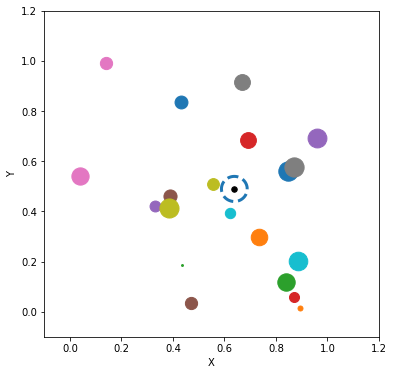

In [18]:
fig = plt.figure(figsize=(6, 6))
for i in instance.i:
    plt.scatter(value(instance.Xloc[i]), value(instance.Yloc[i]),s=2000*value(instance.Mass[i]))
    
results = opt.solve(instance) #solves and updates instance
plt.scatter(value(instance.x), value(instance.y), color='black', s=30)
theta = np.linspace(0, 2*np.pi, 100)
#Center of mass
Xc = value(instance.x) + 0.05*np.cos(theta)
Yc = value(instance.y) + 0.05*np.sin(theta)

plt.plot(Xc, Yc, '--',lw=3)
#plt.axis('off')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-0.1, 1.2)
plt.ylim(-0.1, 1.2)
plt.show()